## Heart Attack Prediction



#### Libraries

In [1]:
# Dataframe/numerical libraries
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Machine Learning libraries
# Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
# Pre-processing
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
# Evaluate
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, roc_curve

#### Dataset

In [6]:
# Read the dataset
heart = pd.read_csv(r"C:\Users\Murillo\Desktop\Python\Portfolio\Heart_Attack\heart.csv")
heart.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
heart.shape

(303, 14)

In [8]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
heart.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [10]:
heart[heart.duplicated()]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [11]:
heart.drop_duplicates(inplace=True)

In [12]:
heart.describe().T

,count,mean,std,min,25%,50%,75%,max
age,302.0,54.420530,9.047970,29.0,48.00,55.5,61.00,77.0
sex,302.0,0.682119,0.466426,0.0,0.00,1.0,1.00,1.0
cp,302.0,0.963576,1.032044,0.0,0.00,1.0,2.00,3.0
trtbps,302.0,131.602649,17.563394,94.0,120.00,130.0,140.00,200.0
chol,302.0,246.500000,51.753489,126.0,211.00,240.5,274.75,564.0
fbs,302.0,0.149007,0.356686,0.0,0.00,0.0,0.00,1.0
restecg,302.0,0.526490,0.526027,0.0,0.00,1.0,1.00,2.0
thalachh,302.0,149.569536,22.903527,71.0,133.25,152.5,166.00,202.0
exng,302.0,0.327815,0.470196,0.0,0.00,0.0,1.00,1.0
oldpeak,302.0,1.043046,1.161452,0.0,0.00,0.8,1.60,6.2


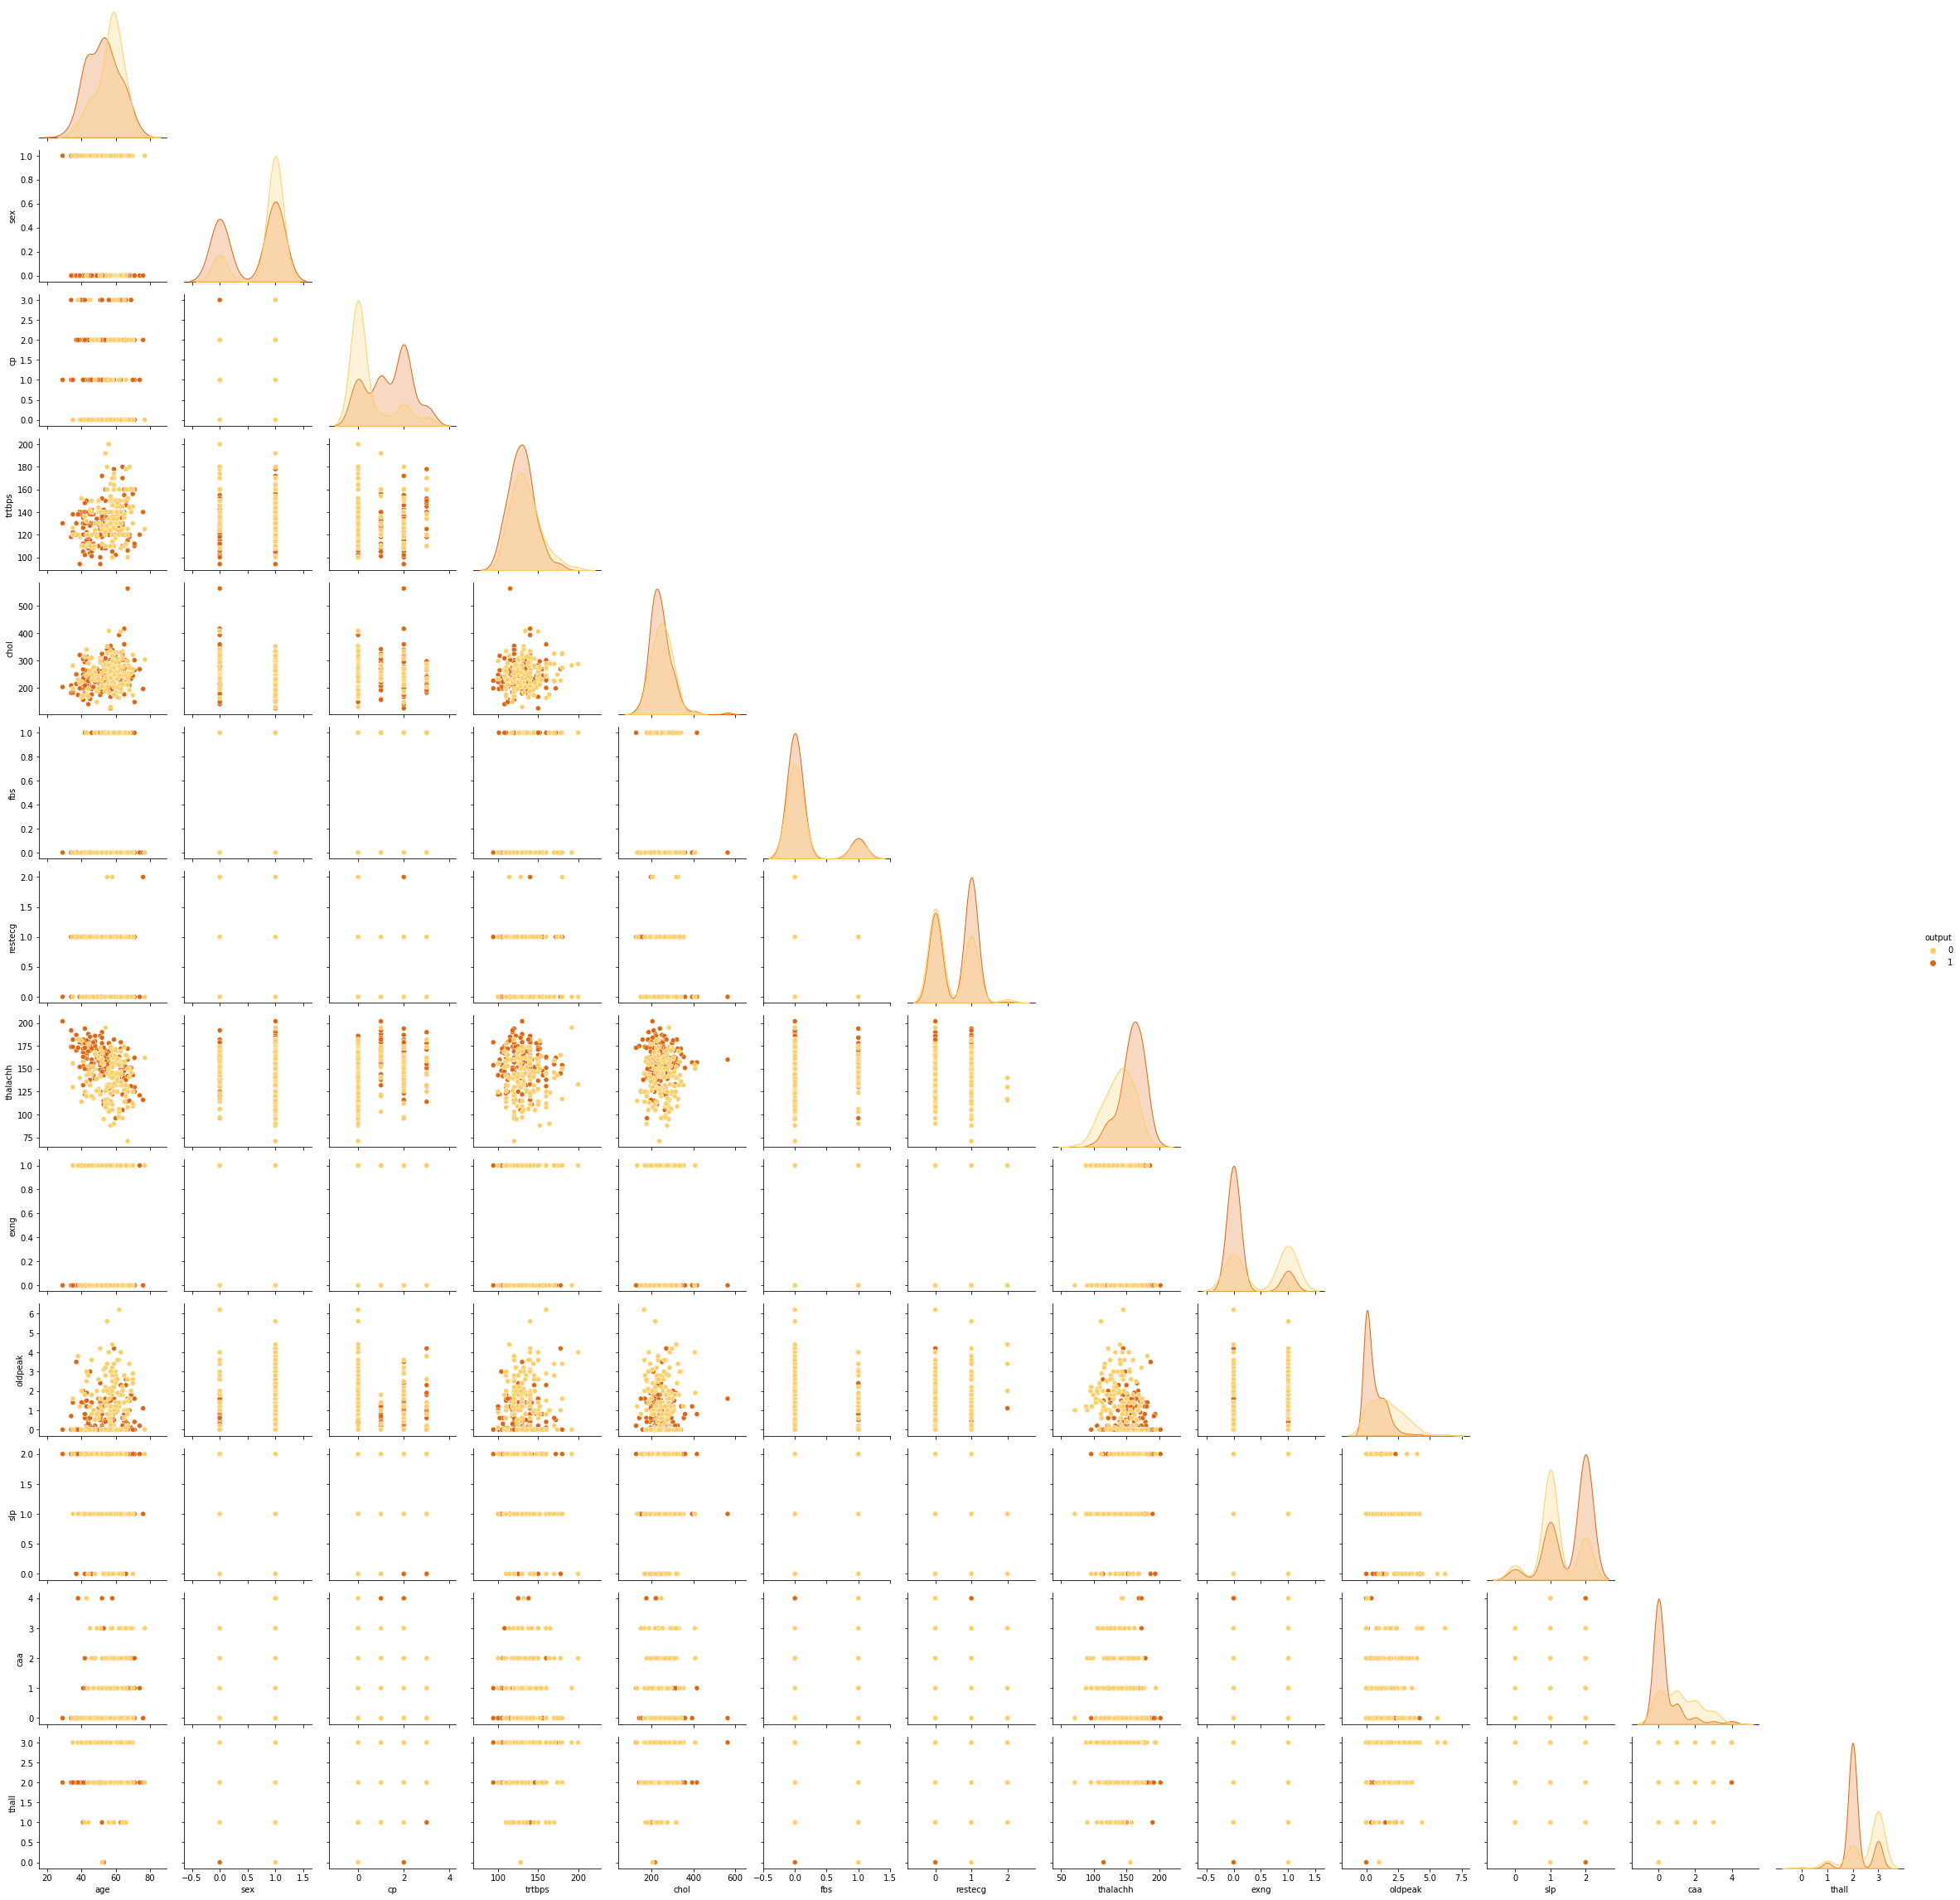

In [13]:
pair = sns.PairGrid(heart, hue="output", palette="YlOrBr", diag_sharey=False, corner=True)
pair.map_lower(sns.scatterplot)
pair.map_diag(sns.kdeplot, fill=True)
pair.add_legend();

In [14]:
X = heart.drop("output", axis=1)
y = heart.output

In [15]:
y.value_counts()

1    164
0    138
Name: output, dtype: int64

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

#### Pre-Processing

In [17]:
prep = make_column_transformer((StandardScaler(), ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']), remainder='passthrough')

#### Models

In [18]:
logreg = LogisticRegression(solver='liblinear')
random = RandomForestClassifier()
knn = KNeighborsClassifier()
svc = SVC()
gbt = GradientBoostingClassifier()

models = [logreg, random, knn, svc, gbt]

#### Accuracy

In [19]:
def accuracy(X_train, X_test, prep, models):
  name = []
  results = []
  for i in models:
    name.append(str(i))
    pipe = make_pipeline(prep, i)
    pipe.fit(X_train, y_train)
    y_predict = pipe.predict(X_test)
    accuracy = accuracy_score(y_test, y_predict)
    results.append(accuracy)
  df = pd.DataFrame({'Model':name, 'Accuracy':results})
  return df
  
accuracy(X_train, X_test, prep, models)

,Model,Accuracy
0,LogisticRegression(solver='liblinear'),0.836066
1,RandomForestClassifier(),0.819672
2,KNeighborsClassifier(),0.836066
3,SVC(),0.819672
4,GradientBoostingClassifier(),0.770492


#### Correlation

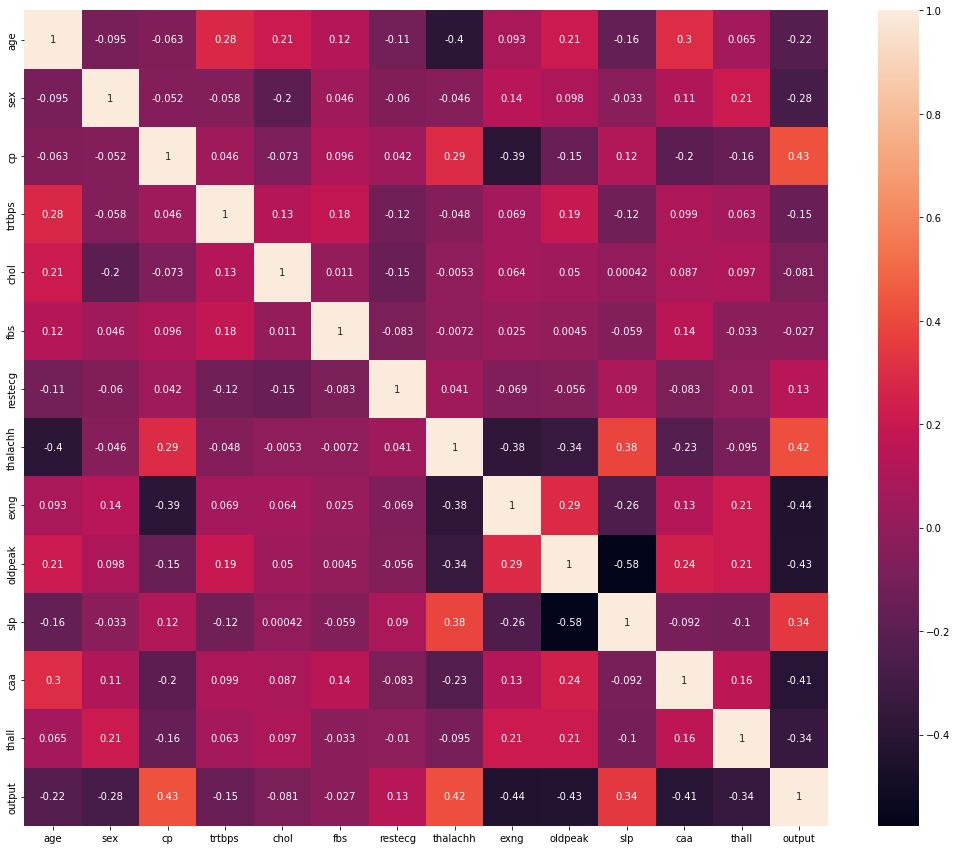

In [20]:
plt.figure(figsize=(18,15))
sns.heatmap(heart.corr(), annot=True)
plt.show()

#### Selecting features

In [21]:
X_select = heart[['sex', 'cp', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall']]
X_train_select, X_test_select, y_train, y_test = train_test_split(X_select, y, test_size=0.2, random_state=0, stratify=y)

In [22]:
prep_select = make_column_transformer((StandardScaler(), ['thalachh', 'oldpeak']), remainder='passthrough')

#### New Features Accuracy

In [23]:
accuracy(X_train_select, X_test_select, prep_select, models)

,Model,Accuracy
0,LogisticRegression(solver='liblinear'),0.885246
1,RandomForestClassifier(),0.852459
2,KNeighborsClassifier(),0.852459
3,SVC(),0.852459
4,GradientBoostingClassifier(),0.852459


#### Accuracy cross validation features select

In [26]:
def cross_accuracy(X, prep):
    name = []
    results = []
    for i in models:
      name.append(str(i))
      pipe = make_pipeline(prep, i)
      accuracy = cross_val_score(pipe, X, y, cv=10, scoring="accuracy").mean()
      results.append(accuracy)
    df = pd.DataFrame({'Model':name, 'Cross_Val_Accuracy':results})
    return df

cross_accuracy(X_select, prep_select)

,Model,Cross_Val_Accuracy
0,LogisticRegression(solver='liblinear'),0.841183
1,RandomForestClassifier(),0.837527
2,KNeighborsClassifier(),0.831290
3,SVC(),0.841183
4,GradientBoostingClassifier(),0.827634


#### Parameters

In [27]:
param_log = {'max_iter':np.arange(80,110), 'C':[0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2]}
param_random = {'n_estimators':np.arange(80,110), 'criterion':('gini', 'entropy'), 'max_depth':np.arange(1,8)}
param_knn = {'n_neighbors':np.arange(1,20), 'weights':('uniform', 'distance')}
param_svc = {'kernel':('linear', 'poly', 'rbf', 'sigmoid'), 'C':[0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2]}
param_gbt = {'n_estimators':np.arange(80,110), 'max_depth':np.arange(1,8)}
params = [param_log, param_random, param_knn, param_svc, param_gbt]

In [28]:
def parameters(X_train):
  name = []
  for i, j in zip(models, params):
    name.append(str(i))
    grid = GridSearchCV(i, j, cv=10)
    grid.fit(X_train, y_train)
    print(str(i), '- Best_parameters:', grid.best_params_, '- Best_score:', grid.best_score_)

parameters(X_train_select)

LogisticRegression(solver='liblinear') - Best_parameters: {'C': 0.25, 'max_iter': 80} - Best_score: 0.842
RandomForestClassifier() - Best_parameters: {'criterion': 'entropy', 'max_depth': 6, 'n_estimators': 80} - Best_score: 0.8506666666666668
KNeighborsClassifier() - Best_parameters: {'n_neighbors': 5, 'weights': 'uniform'} - Best_score: 0.7633333333333334
SVC() - Best_parameters: {'C': 0.25, 'kernel': 'linear'} - Best_score: 0.8215
GradientBoostingClassifier() - Best_parameters: {'max_depth': 1, 'n_estimators': 84} - Best_score: 0.8381666666666666


#### Models with parameters

In [29]:
log = LogisticRegression(solver='liblinear', C= 0.25, max_iter= 80)
rand = RandomForestClassifier(n_estimators=89, criterion='entropy', max_depth=7)
neighbor = KNeighborsClassifier(n_neighbors=5, weights='uniform')
svc_param = SVC(C=0.25, kernel='linear')
gbt_param = GradientBoostingClassifier(n_estimators=84, max_depth=1)

model_param = [log, rand, neighbor, svc_param, gbt_param]

#### New accuracy

In [30]:
accuracy(X_train_select, X_test_select, prep_select, model_param)

,Model,Accuracy
0,"LogisticRegression(C=0.25, max_iter=80, solver...",0.885246
1,"RandomForestClassifier(criterion='entropy', ma...",0.836066
2,KNeighborsClassifier(),0.852459
3,"SVC(C=0.25, kernel='linear')",0.868852
4,"GradientBoostingClassifier(max_depth=1, n_esti...",0.868852


#### ROC AUC

In [31]:
pipe_log = make_pipeline(prep_select, log)
y_log_proba = pipe_log.predict_proba(X_test_select)[:,1]

In [33]:
pipe_rand = make_pipeline(prep_select, rand)
y_rand_proba = pipe_rand.predict_proba(X_test_select)[:,1]


In [34]:
pipe_knn = make_pipeline(prep_select, neighbor)
y_knn_proba = pipe_knn.predict_proba(X_test_select)[:,1]

In [35]:
pipe_gbt = make_pipeline(prep_select, gbt_param)
y_gbt_proba = pipe_gbt.predict_proba(X_test_select)[:,1]

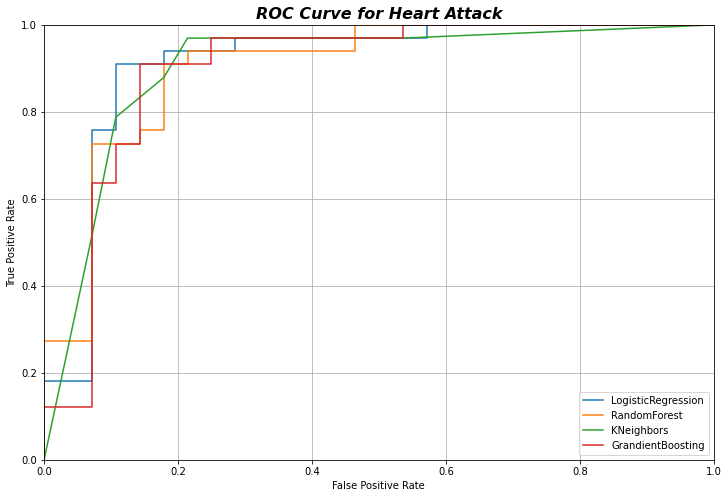

In [45]:
# instantiating the roc_cruve
fpr_log,tpr_log,threshols=roc_curve(y_test,y_log_proba)
fpr_rand,tpr_rand,threshols=roc_curve(y_test,y_rand_proba)
fpr_knn,tpr_knn,threshols=roc_curve(y_test,y_knn_proba)
fpr_gbt,tpr_gbt,threshols=roc_curve(y_test,y_gbt_proba)
# plotting the curve
plt.figure(figsize=(12,8))
plt.plot(fpr_log,tpr_log, label='LogisticRegression')
plt.plot(fpr_rand,tpr_rand, label='RandomForest')
plt.plot(fpr_knn,tpr_knn, label='KNeighbors')
plt.plot(fpr_gbt,tpr_gbt, label='GrandientBoosting')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Heart Attack", fontdict={'fontweight':'bold', 'fontsize':16, 'family':'Georgia', 'style':'italic'})
plt.legend(loc='lower right')
plt.grid(True)
plt.show();

#### Confusion Matrix

In [39]:
y_log_predict = pipe_log.predict(X_test_select)

In [40]:
confusion_matrix(y_test, y_log_predict)

array([[23,  5],
       [ 2, 31]])

In [41]:
recall_score(y_test, y_log_predict)

0.9393939393939394

In [42]:
specificity = 23/float(28)
specificity

0.8214285714285714

In [43]:
precision_score(y_test, y_log_predict)

0.8611111111111112

#### Conclusion

In this analysis, comparing the accuracies and the ROC curve we determined that **LogisticRegression** was the best model to predicted heart attack, with a accuracy of **88,52%**. We had the best result using 'sex', 'cp', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa' and 'thall' as the features for the model.
We got a **Sensitivity(True Positive Rate)** of **93,94%** and a **Specificity(True Negative Rate)** of **82,14%**. A good score to predict the chance of have a heart attack.